# **Question 1: Linear Regression — Predicting House Prices**

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving train data.csv to train data.csv


In [ ]:
import pandas as pd
df= pd.read_csv('train data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df = df[['OverallQual', 'SalePrice']].dropna()

In [ ]:
from sklearn.model_selection import train_test_split
X = df['OverallQual'].values
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean_x = X_train.mean()
mean_y = y_train.mean()
num = ((X_train - mean_x) * (y_train - mean_y)).sum()
denom = ((X_train - mean_x) ** 2).sum()
m = num / denom
b = mean_y - m * mean_x
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")
y_train_pred_custom = m * X_train + b
y_test_pred_custom = m * X_test + b

Slope (m): 44379.87767098291
Intercept (b): -90233.22290028064


In [ ]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_test_pred_custom)
print(f"Test MSE: {mse_test:.2f}")


Test MSE: 2681026163.51


In [ ]:
from sklearn.linear_model import LinearRegression
X_train_2D = X_train.values.reshape(-1, 1)
X_test_2D = X_test.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train_2D, y_train)
y_train_pred_sklearn = model.predict(X_train_2D)
y_test_pred_sklearn = model.predict(X_test_2D)
mse_test = mean_squared_error(y_test, y_test_pred_sklearn)
print(f"Test MSE (sklearn LinearRegression): {mse_test:.2f}")

Test MSE (sklearn LinearRegression): 2681026163.51


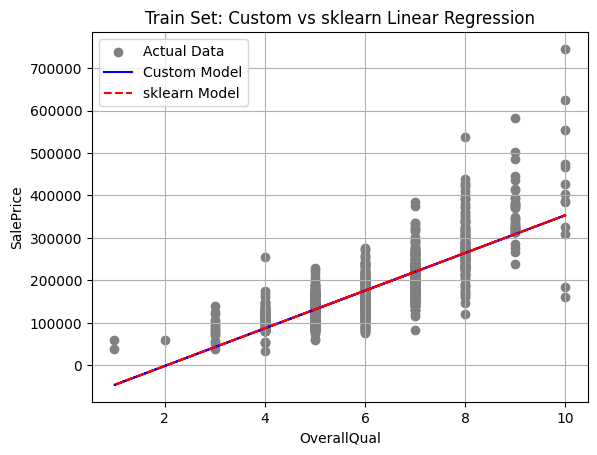

In [ ]:
plt.scatter(X_train, y_train, color='gray', label='Actual Data')
plt.plot(X_train, y_train_pred_custom, color='blue', label='Custom Model')
plt.plot(X_train, y_train_pred_sklearn, color='red', linestyle='--', label='sklearn Model')
plt.title('Train Set: Custom vs sklearn Linear Regression')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()

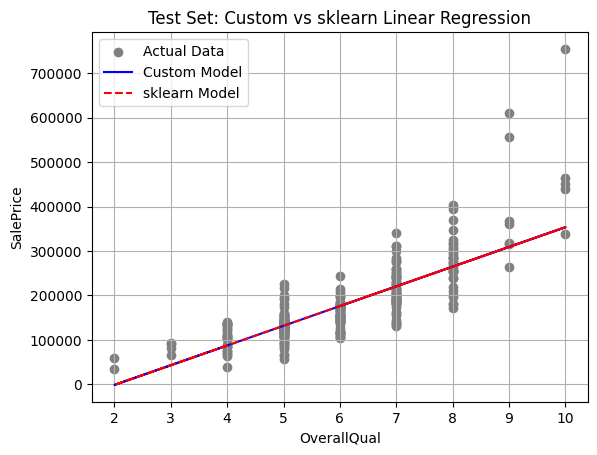

In [ ]:
plt.scatter(X_test, y_test, color='gray', label='Actual Data')
plt.plot(X_test, y_test_pred_custom, color='blue', label='Custom Model')
plt.plot(X_test, y_test_pred_sklearn, color='red', linestyle='--', label='sklearn Model')
plt.title('Test Set: Custom vs sklearn Linear Regression')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()